In [1]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:
import sde
import numpy as np
import matplotlib.pyplot as plt
import threading as thr
%matplotlib inline

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (14.0, 7.0)
rcParams['figure.dpi'] = 200
rcParams['font.size'] = 18

# Численные методы решения многомерного СДУ со слабым порядком сходимости

Генерируем $N$ шагов Винеровского процесса на временном промежудке $[0,1]$

In [4]:
N = 10**3
dt, t, dW, W = sde.wiener_process(N,dim=2)

Будем решать систему СДУ со следующими функцией сноса и дифузии:
\begin{equation}
    f(x^1(t), x^2(t)) = 
    \begin{bmatrix}
        -\frac{273}{512}x^{1} & 0\\
        -\frac{1}{160}x^1 + \left(-\frac{785}{512} +\frac{\sqrt{2}}{8} \right)x^2
    \end{bmatrix}
\end{equation}
\begin{equation}
    G(x^1(t), x^2(t)) = 
    \begin{bmatrix}
        \frac14 x^1 & \frac{1}{16}x^1\\
        \frac{1-2\sqrt{2}}{4}x^2 & \frac{1}{10}x^1 + \frac{1}{16}x^2
    \end{bmatrix}
\end{equation}

In [5]:
def f(x):
    """Вектор сноса"""
    return np.array([(-273.0/512.0)*x[0], -(1.0/160.0)*x[0] + (-785.0/512.0 + np.sqrt(2)/8.0)*x[1]])

def G(x):
    """Матрица диффузии"""
    return np.array([[0.25*x[0], (1.0/16.0)*x[0]],
                     [x[1]*(1.0-2.0*np.sqrt(2))/4.0, 0.1*x[0] + x[1]*1.0/16.0]])

In [6]:
x_0 = np.array([1.0, 1.0])
x_num = sde.weakSRKp2Wm(f, G, dt, x_0, dW, name='SRK1Wm')
len(x_num)

1000

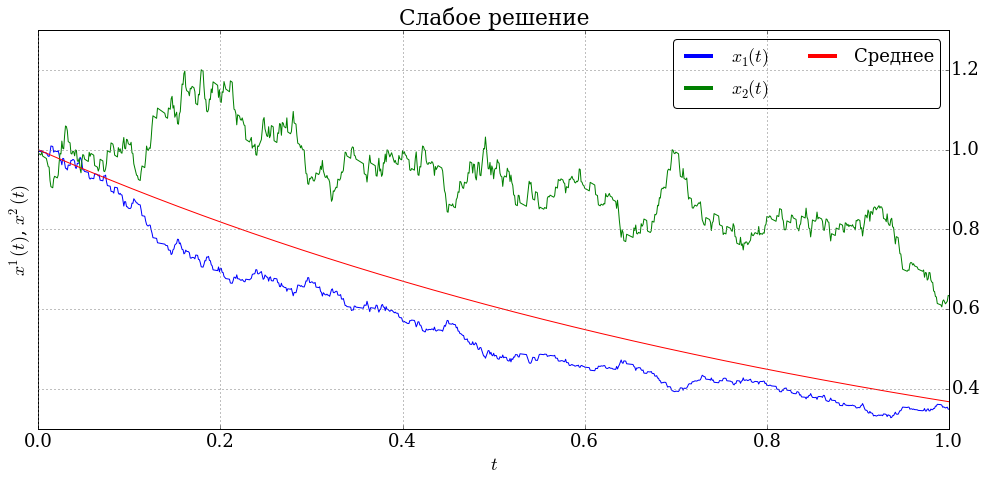

In [7]:
fig1 = plt.figure(0)
ax1 = fig1.add_subplot(1,1,1)

ax1.set_title("Слабое решение")
ax1.set_ylabel("$x^{1}(t)$, $x^{2}(t)$")
ax1.set_xlabel("$t$")
ax1.yaxis.tick_right()

ax1.plot(t,x_num[:,0], label='$x_{1}(t)$')
ax1.plot(t,x_num[:,1], label='$x_{2}(t)$')
ax1.plot(t,np.exp(-t), label='Среднее')

ax1.legend(ncol=2)

for line in ax1.get_legend().get_lines():
    line.set_linewidth(4.0)
    
fig1.tight_layout()

## Анализ статистических данных прогонов

Прогоны программы с методом Эйлера-Маруямы

In [16]:
#x1_nums = np.load("EM_1000_steps_1000N_x1.npy")
#x2_nums = np.load("EM_1000_steps_1000N_x2.npy")

x1_nums2 = np.load("EM_N1000_sim5000_x1.npy")
x2_nums2 = np.load("EM_N1000_sim5000_x2.npy")

Прогоны программы со схемой Рунге-Кутты второго порядка слабой сходимости и только для двухмерной системы уравнений

In [17]:
#x1_nums2 = np.load("RK_1000_steps_1000N_x1.npy")
#x2_nums2 = np.load("RK_1000_steps_1000N_x1.npy")

Прогоны программы с сильной схемой Рунге-Кутты

In [18]:
x1_nums = np.load("RK_N1000_sim5000_x1.npy")
x2_nums = np.load("RK_N1000_sim5000_x2.npy")

In [20]:
fig2 = plt.figure(1)
ax2 = fig2.add_subplot(1,1,1)

ax2.set_title("Аппроксимация математического ожидания")
ax2.set_ylabel("$x^{1}(t)$, $x^{2}(t)$")
ax2.set_xlabel("$t$")
ax2.yaxis.tick_right()

ax2.plot(t,np.mean(x1_nums**2, axis=0), label='$x_{1}(t)$')
ax2.plot(t,np.mean(x1_nums2**2, axis=0), label='$x_{1}(t)$')

#ax2.plot(t,np.mean(x2_nums**2, axis=0), label='$x_{2}(t)$')
ax2.plot(t,np.exp(-t), label='Среднее')

ax2.legend(ncol=2)

for line in ax2.get_legend().get_lines():
    line.set_linewidth(4.0)
    
fig2.tight_layout()

Вычислим слабую погрешность
$$ \|\bar{\mathbf{x}} - \mathrm{E}\mathbf{x}\| = \sqrt{(\bar{x}^1_n - 0.1\exp(t_{n}))^2 + (\bar{x}^2_n - 0.1\exp(t_{n}))^2} $$

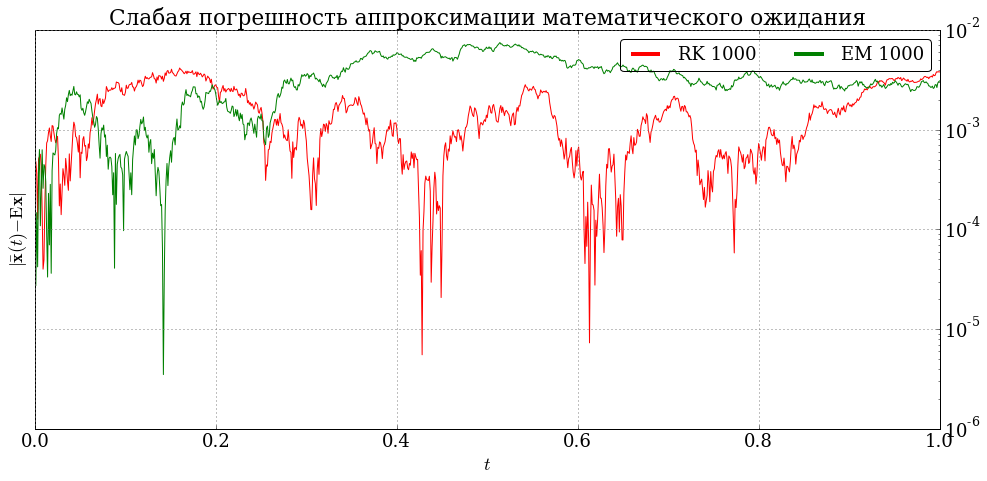

In [23]:
fig3 = plt.figure(2)
ax3 = fig3.add_subplot(1,1,1)

ax3.set_title("Слабая погрешность аппроксимации математического ожидания")
ax3.set_ylabel(r'$\|\bar{\mathbf{x}}(t)-\mathrm{E}\mathbf{x}\|$')
ax3.set_xlabel("$t$")
ax3.yaxis.tick_right()
ax3.set_yscale('log')

ax3.plot(t,np.abs(np.mean(x1_nums**2, axis=0) - np.exp(-t)), label="RK 1000", color='r')

ax3.plot(t,np.abs(np.mean(x1_nums2**2, axis=0) - np.exp(-t)), label="EM 1000", color='g')

#ax3.plot(t,np.sqrt((x1_nums2.mean(axis=0)-0.1*np.exp(t))**2 + (x2_nums2.mean(axis=0)-0.1*np.exp(t))**2),
         #label="RK 1000", color='b')

#ax3.plot(t,np.sqrt((x1_nums3.mean(axis=1)-0.1*np.exp(t))**2 + (x2_nums3.mean(axis=1)-0.1*np.exp(t))**2),
#         label="EM 100000", color='g')
#ax3.plot(t,np.abs(x2_nums.mean(axis=1)-0.1*np.exp(t)), label=r'$\|\bar{x}_{2}(t)-\mathrm{E}x_{2}\|$')

ax3.legend(ncol=2)

for line in ax3.get_legend().get_lines():
    line.set_linewidth(4.0)
    
fig3.tight_layout()

Различные характеристики статистической выборки (прогонов): квантили, среднии и моменты второго порядка

In [13]:
Ex = x1_nums.mean(axis=0)
Median  = np.median(x1_nums, axis=0)
Q1, Q3, Q95, Q5, Q100, Q0 = np.percentile(x1_nums, (25, 75, 95, 5, 100, 0), axis=0)
Dx = np.mean(x1_nums**2, axis=0)

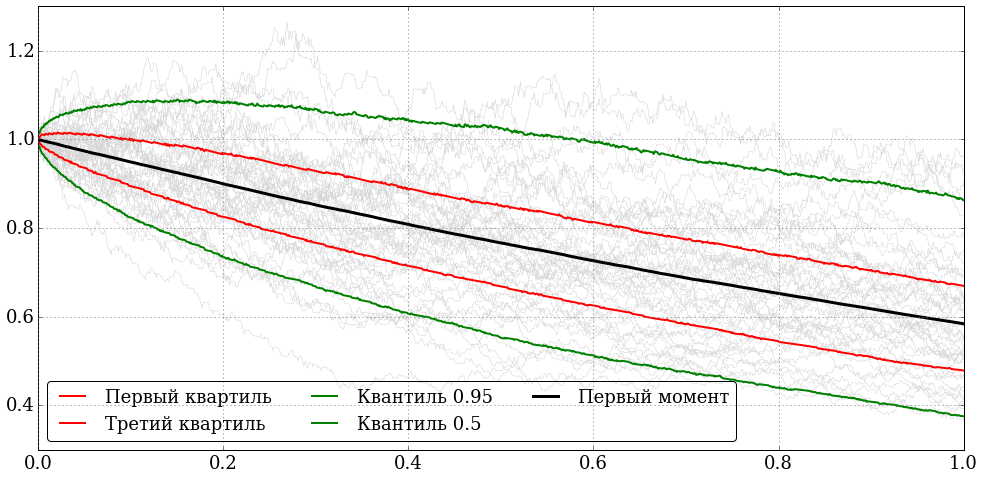

In [14]:
fig4 = plt.figure(3)
ax4 = fig4.add_subplot(1,1,1)

for sim_num in range(50):
    ax4.plot(t, x1_nums[sim_num, :], color='lightgray', lw=0.5)
    
ax4.plot(t, Q1, color='r', label='Первый квартиль', lw = 2.0)
ax4.plot(t, Q3, color='r', label='Третий квартиль', lw = 2.0)
ax4.plot(t, Q95, color='g', label='Квантиль 0.95', lw = 2.0)
ax4.plot(t, Q5, color='g', label='Квантиль 0.5', lw = 2.0)
ax4.plot(t, Ex, color='k', label='Первый момент', lw = 3.0)

#ax4.plot(t, Q100, color='b', label='Процентиль', lw = 2.0)
#ax4.plot(t, Q0, color='b', label='Процентиль', lw = 2.0)
ax4.legend(ncol=3, loc='lower left', framealpha=None)
fig4.tight_layout()